# Notes on Master's thesis of Enis
The following notebook was prepared by Dr. Candace Makeda Moore based on a conversation with Enis on 11/25/2021.


## Libraries and datasets

In [7]:
# import libraries
#import makedalytics as ma


import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
#from matplotlib import rc
from datetime import datetime
from datetime import date
from pandas.tseries.offsets import DateOffset
import datetime as dt

# math libraries and packages
import math as mth
#import scipy
#from scipy import stats
#fancy visualization and other fancy libraries and packages

#from IPython.display import Markdown, display

In [8]:
#ma.packages_to()

In [9]:
#import_ox = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')
import_ox = pd.read_csv("OxCGRT_latest.csv")

/Users/enisaboalhasan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
# eventually Oxford may take this site down, so periodically update the big dataset by altering the code below
# uncomment and run with new name ;)
#import_ox.to_csv('biggest_ox_286_11_2021.csv') 
import_ox

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217459,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20211123,NaN,NaN,NaN,NaN,...,NaN,44.44,NaN,53.1,NaN,46.88,NaN,53.57,NaN,0.0
217460,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20211124,NaN,NaN,NaN,NaN,...,NaN,44.44,NaN,53.1,NaN,46.88,NaN,53.57,NaN,0.0
217461,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20211125,NaN,NaN,NaN,NaN,...,NaN,44.44,NaN,53.1,NaN,46.88,NaN,53.57,NaN,0.0
217462,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20211126,NaN,NaN,NaN,NaN,...,NaN,44.44,NaN,53.1,NaN,46.88,NaN,53.57,NaN,0.0


## Looking at the Oxford dataset

In [11]:
print("Possible countries to choose:\n", import_ox.CountryName.unique())

Possible countries to choose:
 ['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium'
 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Democratic Republic of Congo' 'Congo' 'Colombia' 'Comoros' 'Cape Verde'
 'Costa Rica' 'Cuba' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Faeroe Islands' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Guinea'
 'Gambia' 'Greece' 'Greenland' 'Guatemala' 'Guam' 'Guyana' 'Hong Kong'
 'Honduras' 'Croatia' 'Haiti' 'Hungary' 'Indonesia' 'India' 'Ireland'
 'Iran' 'Iraq' 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Jordan

In [12]:
import_ox ['date_as_date']=pd.to_datetime(import_ox['Date'], format ='%Y%m%d')
import_ox = import_ox[['date_as_date','CountryName', 'StringencyIndex']]

In [13]:
year_2020_ox = import_ox[import_ox.date_as_date < '2021-01-01']
year_2020_ox

,date_as_date,CountryName,StringencyIndex
0,2020-01-01,Aruba,0.00
1,2020-01-02,Aruba,0.00
2,2020-01-03,Aruba,0.00
3,2020-01-04,Aruba,0.00
4,2020-01-05,Aruba,0.00
...,...,...,...
217128,2020-12-27,Zimbabwe,69.44
217129,2020-12-28,Zimbabwe,69.44
217130,2020-12-29,Zimbabwe,69.44
217131,2020-12-30,Zimbabwe,69.44


In [14]:
len(year_2020_ox.CountryName.unique())

186

In [15]:
len(year_2020_ox[year_2020_ox.CountryName == 'Israel'])

366

In [16]:
for name in year_2020_ox.CountryName.unique():
    avg_stringency = year_2020_ox[year_2020_ox.CountryName == name].StringencyIndex.sum()/len(year_2020_ox[year_2020_ox.CountryName == name])
    print(name, avg_stringency)
    

Aruba 43.26467213114754
Afghanistan 40.62234972677595
Angola 58.29655737704918
Albania 55.196120218579225
Andorra 38.40909836065573
United Arab Emirates 50.40887978142077
Argentina 71.33516393442623
Australia 55.85450819672131
Austria 47.06521857923496
Azerbaijan 65.47890710382514
Burundi 11.843879781420767
Belgium 51.21683060109289
Benin 37.839863387978134
Burkina Faso 36.08327868852459
Bangladesh 66.01172131147543
Bulgaria 40.35183060109289
Bahrain 55.19174863387978
Bahamas 63.39721311475409
Bosnia and Herzegovina 46.82188524590164
Belarus 24.918415300546457
Belize 57.69336065573771
Bermuda 45.50923497267759
Bolivia 67.19986338797814
Brazil 56.91750292740048
Barbados 45.277622950819676
Brunei 38.31950819672131
Bhutan 63.92814207650272
Botswana 50.925327868852456
Central African Republic 39.56453551912568
Canada 53.560852849336456
Switzerland 42.285218579234964
Chile 62.669699453551914
China 54.856588114754096
Cote d'Ivoire 38.355273224043714
Cameroon 42.06560109289617
Democratic Repu

###  OK, here you may want to notice that actually average stringency for many countries was close to 50. In Irael it was about 58. Makes sense when you remember how many periods had really low stringency. So is what you are asking what if we replaced periods of stringency over 50 with 50, or what if we were always at 50? These are different questions. You need to produce a daily set of values you want to get an awnser for- at least in a document if not in code.  Draw it on paper and send a photograh, or type a description into a document...but you need to choose whatever you model in the most specific way possible. 

## Next, I will demo a shifting window about OSI and R


### Let's make the dataset

In [22]:
israeli_ox = import_ox[import_ox.CountryName == 'Israel']
#israeli_ox['date_as_date']=pd.to_datetime(israeli_ox['Date'], format ='%Y%m%d')
israeli_ox= israeli_ox[['date_as_date', 'StringencyIndex']]
israeli_ox = israeli_ox[israeli_ox.date_as_date < dt.datetime(2021,7, 1)].copy(deep = True)

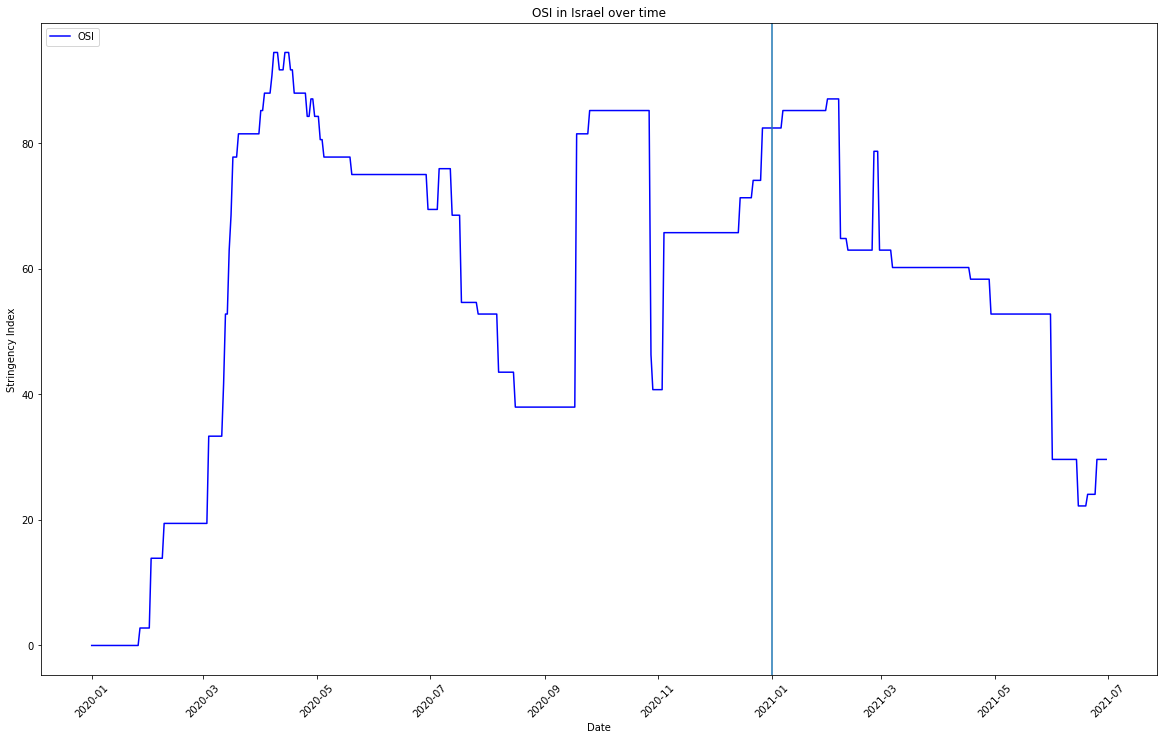

In [23]:
# show stringency in Israel
fig, ax = plt.subplots(figsize=(20, 12))

#Add x-axis and y-axis
ax.plot(pd.to_datetime(israeli_ox.date_as_date, format='%Y-%m-%d'),
       israeli_ox.StringencyIndex,
       label='OSI',
       color='blue')



# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Stringency Index",
       title="OSI in Israel over time")

plt.xticks(rotation=45)
plt.legend(loc='upper left')
#plt.title("OSI in Israel over time")

# throw in a line at year cut-off
plt.axvline(dt.datetime(2021, 1, 1))
# plt.axvline(dt.datetime(2021, 5, 1))
# plt.axvline(dt.datetime(2021, 7, 1))

In [24]:
### to usse more data, I prefer to use some data in 2021, but it's a choice...I'll read in R values

In [26]:
R = pd.read_csv('R_for_israel_from_moh_R_for_israel_from_moh.csv')

In [27]:
R = R.rename(columns = {'date': 'date_as_date', 'R': 'r'})
R.tail(15)

,date_as_date,r
468,6/12/2021,2.08
469,6/13/2021,2.27
470,6/14/2021,2.45
471,6/15/2021,2.47
472,6/16/2021,2.29
473,6/17/2021,2.17
474,6/18/2021,1.92
475,6/19/2021,1.84
476,6/20/2021,1.75
477,6/21/2021,1.54


In [28]:
# reformat the dates to matcht the other datafram we are dealing with
R['date_as_date']=pd.to_datetime(R['date_as_date'], format ='%m/%d/%Y')
R

,date_as_date,r
0,2020-03-01,2.64
1,2020-03-02,2.25
2,2020-03-03,2.39
3,2020-03-04,2.44
4,2020-03-05,2.36
...,...,...
478,2021-06-22,1.43
479,2021-06-23,1.41
480,2021-06-24,1.45
481,2021-06-25,1.43


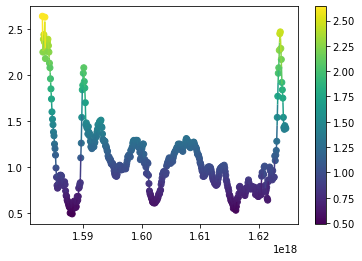

In [29]:
# let's take a peak at that, colored for ease of understanding
def colored_line(x, y, c):
    N = 501
    
    xx = np.linspace(x.min(), x.max(), N)
    yy = np.interp(xx, x, y)
    cc = np.interp(xx, x, c)
    
    ax = plt.gca()
    
    points = np.array([xx, yy]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(yy.min(), yy.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    lc.set_array(cc)
    line = ax.add_collection(lc)
    
    dots = ax.scatter(x, y, c=y)
    return line, dots

x = pd.to_datetime(R.date_as_date, format='%Y-%m-%d').view(np.int64)
y = R.r
line, _ = colored_line(x, y, y)
plt.colorbar(line)

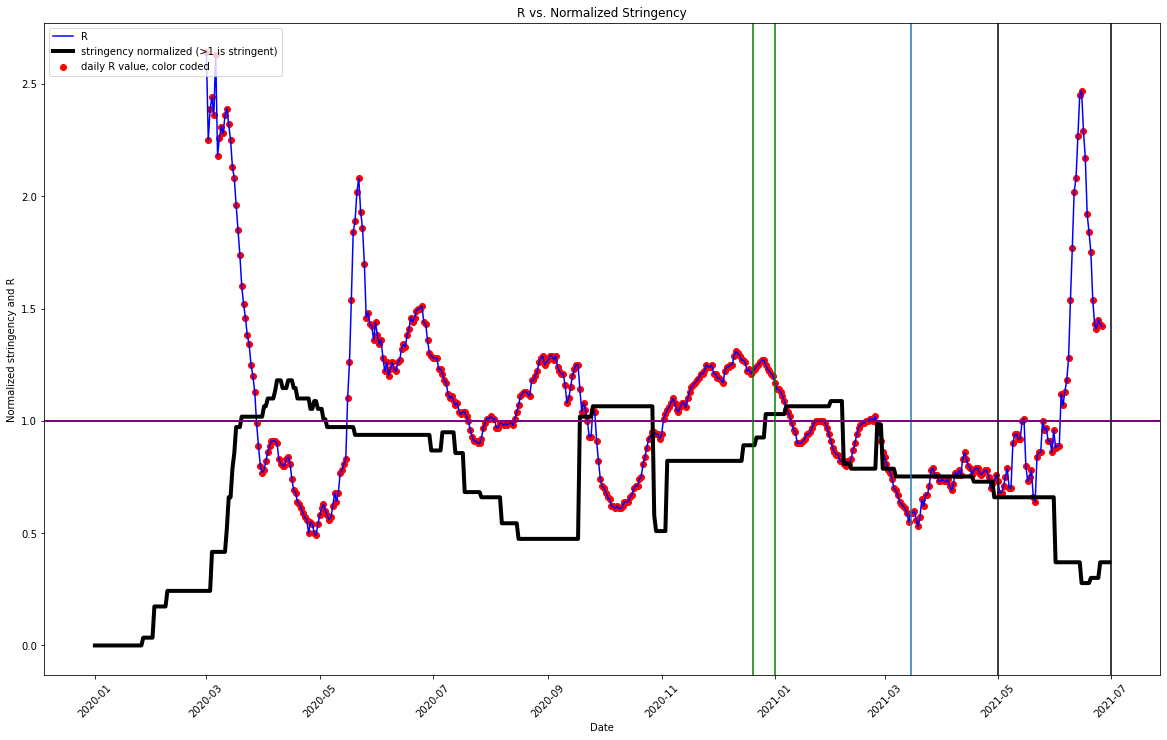

In [30]:
# let's take a peak at something we can play with for correlation visually
fig, ax = plt.subplots(figsize=(20, 12))

#Add x-axis and y-axis
ax.scatter(
    x=R.date_as_date,
    y=R.r,
    label='daily R value, color coded',
    #color=R['colors'],
    c= 'red',    
    cmap='gray',
)
ax.plot(
    R.date_as_date,
    R.r,
    label='R',
    color='blue',
)
       #c= R.colors,    
       #cmap = 'gray')

ax.plot(
    pd.to_datetime(israeli_ox.date_as_date, format='%Y-%m-%d'),
    israeli_ox.StringencyIndex / 80,
    label='stringency normalized (>1 is stringent)',
    color='black',
    linewidth=4,
)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Normalized stringency and R",
       title="R vs. Normalized Stringency")

plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.axvline(dt.datetime(2021, 3, 15))
plt.axhline(1., color = 'purple', linewidth=2);
plt.axvline(dt.datetime(2020, 12, 20), color = 'green')
plt.axvline(dt.datetime(2021, 1, 1), color = 'green')

plt.axvline(dt.datetime(2021, 5, 1), color = 'black')
plt.axvline(dt.datetime(2021, 7, 1), color = 'black');

### Using what we see, or alternatively also through thinking logically, we could suspect know we are clearly going to be dealing with some kind of inverse correlation. When stringency goes up we expect R to fall. The question is how long does it take, and how much do the numbers correlate

In [31]:
israeli_ox.date_as_date = pd.to_datetime(israeli_ox.date_as_date, format='%Y-%m-%d')
for_corr= israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')


### Now we must do some more thinking, because maybe the correlationi changes after vaccination, and we don't know when to expect the correlation to be highest. If we look at all the datablindly , even, on a Spearman's, we may get no correlation becuase of time shifts, and chaning effects after vaccination

In [32]:
# just for example of how to do things the wrong way
total_pearson_r = for_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series: {total_pearson_r}")
total_spearman_r = for_corr.corr(method ='spearman').iloc[0,1]
print(f"Pandas computed Spearman r for entire time series: {total_spearman_r}")

Pandas computed Pearson r for entire time series: -0.3895716825710098
Pandas computed Spearman r for entire time series: -0.26033778012288117


In [33]:
# So basically, overall there was not such a big correlation- which makes sense becuase it the correlation flipped when we vaxed
#let' try before vaccines
corr_before_vaccines = for_corr[for_corr.date_as_date < '2021-01-01' ]
prevax_pearson_r = corr_before_vaccines.corr(method ='pearson').iloc[0,1]
prevax_spearman_r = corr_before_vaccines.corr(method ='spearman').iloc[0,1]
print(f"Pandas computed Pearson r for time series before vaccination: {prevax_pearson_r}")
print(f"Pandas computed Spearman r for time series before vaccination: {prevax_spearman_r}")

Pandas computed Pearson r for time series before vaccination: -0.45368017154870505
Pandas computed Spearman r for time series before vaccination: -0.47806900802272273


### So now we see, we probably don't want to include the period after vaccines relevant. When we take that away we shart to see numbers suspicious for correlation. This only makes sense...once people were vaccinated, they could lower the stringency, and people would not so easily pass the disease...but we don't expect the highest correlation on the same day

In [34]:
# So the obvious question is what happens if we time shift
# let's do a single example for learning  purposes
time_shift_minus3_corr = for_corr
time_shift_minus3_corr['old_R'] = time_shift_minus3_corr.r
time_shift_minus3_corr.r = time_shift_minus3_corr.r.shift(-3)
time_shift_minus3_corr.head(15)
# you should  be able to look at the R vals and see how the shift works

,date_as_date,StringencyIndex,r,old_R
date_as_date,,,,
2020-03-01,2020-03-01,19.44,2.44,2.64
2020-03-02,2020-03-02,19.44,2.36,2.25
2020-03-03,2020-03-03,19.44,2.63,2.39
2020-03-04,2020-03-04,33.33,2.18,2.44
2020-03-05,2020-03-05,33.33,2.26,2.36
2020-03-06,2020-03-06,33.33,2.31,2.63
2020-03-07,2020-03-07,33.33,2.28,2.18
2020-03-08,2020-03-08,33.33,2.36,2.26
2020-03-09,2020-03-09,33.33,2.39,2.31


In [35]:
for_corr = israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')

for i in range(-14, 7):
    
    for_corr_copy = for_corr.copy()
    for_corr_copy['r'] = for_corr['r'].shift(i)
    end = pd.to_datetime('2021-01-10', format='%Y-%m-%d')
    ts_corr_before_vaccines = for_corr_copy[for_corr_copy['date_as_date'] < end]
    ts_prevax_spear_r = ts_corr_before_vaccines['r'].corr(
        method='spearman',
        other=ts_corr_before_vaccines['StringencyIndex'],
    )
#     
    print('''
        Pandas computed Spearman: r, osi for time series with,
        i = {} day shift:
        ts_prevax_pearson_r = {}
    '''.format(i, ts_prevax_spear_r)
    )
#     print('''
#         Pandas computed Spearman r for time series with,
#         i = {} day shift before vaccination:
#         ts_prevax_spearman_r = {}
#     '''.format(i, ts_prevax_spearman_r)
#     )
    #print


        Pandas computed Spearman: r, osi for time series with,
        i = -14 day shift:
        ts_prevax_pearson_r = -0.5329118703029305
    

        Pandas computed Spearman: r, osi for time series with,
        i = -13 day shift:
        ts_prevax_pearson_r = -0.5529952259374603
    

        Pandas computed Spearman: r, osi for time series with,
        i = -12 day shift:
        ts_prevax_pearson_r = -0.5683817865563022
    

        Pandas computed Spearman: r, osi for time series with,
        i = -11 day shift:
        ts_prevax_pearson_r = -0.5797988831693139
    

        Pandas computed Spearman: r, osi for time series with,
        i = -10 day shift:
        ts_prevax_pearson_r = -0.5867702482633266
    

        Pandas computed Spearman: r, osi for time series with,
        i = -9 day shift:
        ts_prevax_pearson_r = -0.5892452554473666
    

        Pandas computed Spearman: r, osi for time series with,
        i = -8 day shift:
        ts_prevax_pearson_r = -0.58

### Notice how the number gently rises and falls...that's often what we see in a true correlation of thuis type...
not alwyas but very often.

#### Now consider that we probably could get a better correlation if we were to use OSI and a few other variables together.... best of luck!